In [1]:
import pandas as pd
df = pd.read_csv('Wholesale.csv')
df.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


In [2]:
df.isna().any()

Channel             False
Region              False
Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicassen          False
dtype: bool

In [3]:
df = df.drop(['Channel', 'Region'], axis = 1)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_df = sc.fit_transform(df)
sc_df = pd.DataFrame(sc_df, columns = df.columns)
sc_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [5]:
from sklearn.cluster import KMeans

In [6]:
model = KMeans(n_clusters = 3, random_state = 0)

In [7]:
model.fit(sc_df)

KMeans(n_clusters=3, random_state=0)

In [8]:
model.labels_

array([2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,

In [9]:
sc_df['cluster'] = model.labels_
sc_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,2
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,2
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,2
...,...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,2
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,2
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,0
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,2


In [10]:
sc_df.groupby('cluster').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,-0.507313,0.585563,0.809716,-0.324183,0.804182,0.083148
1,1.129319,3.805151,3.371239,1.573779,3.287741,2.198588
2,0.126563,-0.372418,-0.431222,0.043124,-0.425596,-0.126350


<AxesSubplot:xlabel='cluster'>

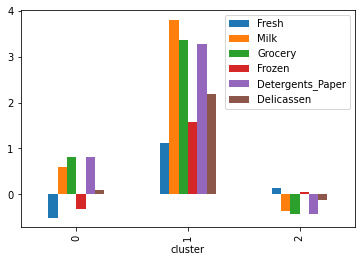

In [11]:
%matplotlib inline
cluster_mean = sc_df.groupby('cluster').mean()
cluster_mean.plot(kind = 'bar')

In [12]:
sse_list = []
for n in range(2, 31):
    model = KMeans(n_clusters = n, random_state = 0)
    model.fit(sc_df)
    sse = model.inertia_
    sse_list.append(sse)
sse_list        

[2043.7998084487574,
 1628.0214373385134,
 1324.1455794934298,
 1066.5186766661345,
 923.6883688142484,
 833.8007189892968,
 750.0515288799987,
 669.778001118845,
 619.9087831783497,
 573.2115000428755,
 531.0043836375461,
 504.8640528760742,
 481.4293564561862,
 445.6723536075933,
 414.2430234107044,
 392.5627999696322,
 378.0524902274034,
 357.22431208201084,
 338.47368167181014,
 318.96015876817034,
 316.912449660479,
 295.26984326838493,
 283.2102043727193,
 270.95923986755014,
 258.2591159268845,
 244.2049859895552,
 237.25299428030436,
 227.20770107034338,
 224.9106039520326]

<AxesSubplot:>

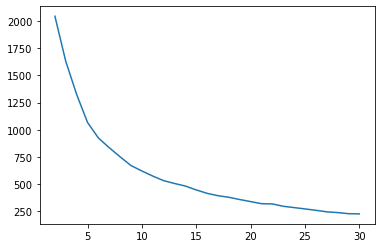

In [13]:
se = pd.Series(sse_list)
num = range(2, 31)
se.index = num
se.plot(kind = 'line')

In [14]:
model = KMeans(n_clusters = 5, random_state = 0)
model.fit(sc_df)
sc_df['cluster'] = model.labels_
sc_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,1
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,1
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,2
...,...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,2
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,2
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,1
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,0


In [15]:
sc_df['cluster'].value_counts()

0    257
1    111
2     61
3     10
4      1
Name: cluster, dtype: int64

<AxesSubplot:xlabel='cluster'>

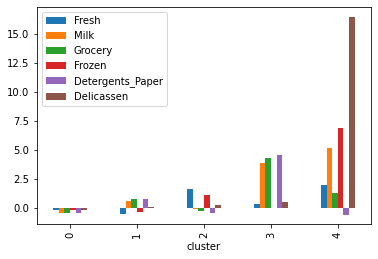

In [16]:
pl = sc_df.groupby('cluster').mean()
pl.plot(kind = 'bar')

In [17]:
df = pd.read_csv('Survived.csv')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [18]:
df = df.drop(['PassengerId', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [19]:
df = df.fillna(df.mean())
df.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
dtype: bool

In [20]:
dummy = pd.get_dummies(df['Sex'], drop_first = True)
df2 = pd.concat([df, dummy], axis = 1)
df2 = df2.drop('Sex', axis = 1)
df2

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,0
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1
887,1,1,19.000000,0,0,30.0000,0
888,0,3,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [21]:
from sklearn.covariance import MinCovDet

mcd = MinCovDet(random_state = 0, support_fraction = 0.7)
mcd.fit(df2)
distance = mcd.mahalanobis(df2)

<AxesSubplot:>

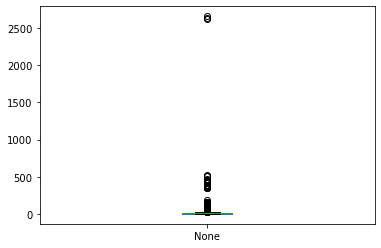

In [22]:
distance = pd.Series(distance)
distance.plot(kind = 'box')

In [23]:
tmp = distance.describe()
tmp

count     891.000000
mean       35.717377
std       167.244089
min         1.222813
25%         2.700145
50%         7.214475
75%        14.398815
max      2659.310776
dtype: float64

In [24]:
iqr = tmp['75%'] - tmp['25%']
jougen = 1.5 * (iqr) + tmp['75%']
kagen = tmp['25%'] - 1.5 * (iqr)

outliner = distance[(distance > jougen) | (distance < kagen)]
outliner

7       61.855745
13      53.581100
16     104.438828
24      58.881380
25      49.081607
          ...    
846    388.509153
850    104.784065
856    153.733867
863    377.607553
885     53.382656
Length: 129, dtype: float64

In [25]:
list_ = []
for i in range(len(outliner.index)):
    list_.append(outliner.index[i])
list_        

[7,
 13,
 16,
 24,
 25,
 27,
 31,
 50,
 59,
 63,
 68,
 71,
 72,
 74,
 85,
 88,
 118,
 119,
 120,
 139,
 159,
 164,
 167,
 169,
 171,
 176,
 180,
 182,
 183,
 195,
 201,
 215,
 229,
 233,
 245,
 257,
 258,
 261,
 266,
 268,
 269,
 278,
 297,
 299,
 305,
 306,
 307,
 310,
 311,
 318,
 319,
 324,
 325,
 332,
 334,
 337,
 341,
 360,
 373,
 374,
 377,
 380,
 385,
 386,
 390,
 393,
 409,
 435,
 437,
 438,
 445,
 480,
 484,
 485,
 498,
 504,
 505,
 509,
 520,
 527,
 529,
 537,
 541,
 542,
 544,
 550,
 557,
 567,
 581,
 609,
 610,
 634,
 638,
 642,
 643,
 655,
 659,
 660,
 678,
 679,
 683,
 686,
 689,
 692,
 698,
 700,
 708,
 716,
 726,
 730,
 737,
 742,
 759,
 763,
 779,
 787,
 792,
 802,
 813,
 819,
 824,
 826,
 829,
 838,
 846,
 850,
 856,
 863,
 885]

In [26]:
for i in (list_):
    df2 = df2.drop(i)
df2

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,0
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1
887,1,1,19.000000,0,0,30.0000,0
888,0,3,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [27]:
df2.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,0
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,0,3,35.000000,0,0,8.0500,1
5,0,3,29.699118,0,0,8.4583,1
6,0,1,54.000000,0,0,51.8625,1
8,1,3,27.000000,0,2,11.1333,0
9,1,2,14.000000,1,0,30.0708,0
10,1,3,4.000000,1,1,16.7000,0


In [28]:
df3 = df2.astype('float')

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_df = sc.fit_transform(df3)
sc_df = pd.DataFrame(sc_df, columns = df3.columns)
sc_df

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,-0.766485,0.794411,-0.673215,1.407930,-0.417489,-0.670927,0.69254
1,1.304656,-1.717378,0.604128,1.407930,-0.417489,2.688457,-1.44396
2,1.304656,0.794411,-0.353879,-0.571484,-0.417489,-0.635514,-1.44396
3,1.304656,-1.717378,0.364626,1.407930,-0.417489,1.734505,-1.44396
4,-0.766485,0.794411,0.364626,-0.571484,-0.417489,-0.628956,0.69254
...,...,...,...,...,...,...,...
757,-0.766485,-0.461484,-0.274045,-0.571484,-0.417489,-0.369264,0.69254
758,1.304656,-1.717378,-0.912717,-0.571484,-0.417489,0.522608,-1.44396
759,-0.766485,0.794411,-0.058564,1.407930,3.177161,0.178975,-1.44396
760,1.304656,-1.717378,-0.353879,-0.571484,-0.417489,0.522608,0.69254


In [29]:
from sklearn.cluster import KMeans

In [30]:
model = KMeans(n_clusters = 2, random_state = 0)
model.fit(sc_df)
sc_df['cluster'] = model.labels_
sc_df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,cluster
0,-0.766485,0.794411,-0.673215,1.407930,-0.417489,-0.670927,0.69254,1
1,1.304656,-1.717378,0.604128,1.407930,-0.417489,2.688457,-1.44396,0
2,1.304656,0.794411,-0.353879,-0.571484,-0.417489,-0.635514,-1.44396,0
3,1.304656,-1.717378,0.364626,1.407930,-0.417489,1.734505,-1.44396,0
4,-0.766485,0.794411,0.364626,-0.571484,-0.417489,-0.628956,0.69254,1
...,...,...,...,...,...,...,...,...
757,-0.766485,-0.461484,-0.274045,-0.571484,-0.417489,-0.369264,0.69254,1
758,1.304656,-1.717378,-0.912717,-0.571484,-0.417489,0.522608,-1.44396,0
759,-0.766485,0.794411,-0.058564,1.407930,3.177161,0.178975,-1.44396,0
760,1.304656,-1.717378,-0.353879,-0.571484,-0.417489,0.522608,0.69254,0


<AxesSubplot:xlabel='cluster'>

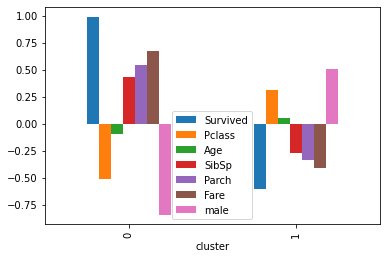

In [31]:
%matplotlib inline

c = sc_df.groupby('cluster').mean()
c.plot(kind='bar')

<AxesSubplot:>

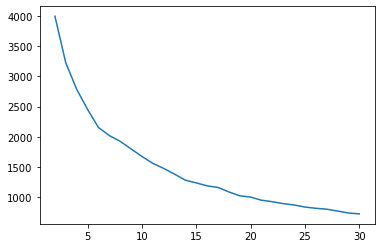

In [32]:
sse_list_ = []
for n in range(2, 31):
    model = KMeans(n_clusters = n, random_state = 0)
    model.fit(sc_df)
    sse = model.inertia_
    sse_list_.append(sse)
se = pd.Series(sse_list_)
num = range(2, 31)
se.index = num
se.plot(kind = 'line')

<AxesSubplot:xlabel='cluster'>

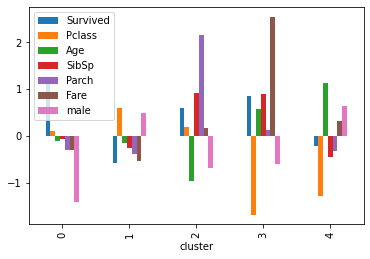

In [33]:
model = KMeans(n_clusters = 5, random_state = 0)
model.fit(sc_df)
sc_df['cluster'] = model.labels_
c = sc_df.groupby('cluster').mean()
c.plot(kind = 'bar')

In [34]:
mcd = MinCovDet(random_state = 0, support_fraction = 1.0)
mcd.fit(sc_df)
distance = mcd.mahalanobis(sc_df)

<AxesSubplot:>

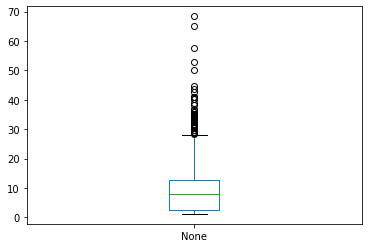

In [35]:
distance = pd.Series(distance)
distance.plot(kind = 'box')

In [36]:
distance.describe()

count    762.000000
mean      10.460447
std        9.904685
min        1.168249
25%        2.657948
50%        8.042257
75%       12.783183
max       68.412997
dtype: float64